In [2]:
import geopandas as gpd
import shapefile as shp
import matplotlib.pyplot as plt
import pandas as pd
import rtree
import seaborn as sns
import matplotlib
import numpy as np

In [3]:
ADMIN2_SHP = 'ET_Admin2_2014/ET_Admin2_2014.shp'

In [4]:
df = gpd.read_file("../../Livelihood zones/eth_lhz_2009_fewsnet.shp")
df.head()

,OBJECTID,FNID,EFF_YEAR,COUNTRY,LZNUM,LZCODE,LZNAMEEN,LZNAMEFR,LZNAMESP,LZNAMEPT,CLASS,ADMIN1,LZTYPE,MAINCROPS,MAINLSTOCK,LIAS,SHAPE_Leng,SHAPE_Area,geometry
0,1,ET2009L101,2009,ET,1,ET01,Addis Ababa City,None,None,None,UB01,Addis Ababa,Urban,None,None,UBN,1.032096,0.045311,"POLYGON ((38.77103 9.09937, 38.77103 9.09937, ..."
1,2,ET2009L102,2009,ET,2,ET02,Asale Agropastoral,None,None,None,PS04,Afar,Agropastoral,maize & barley,cattle & shoats,AAP,2.842439,0.103596,"MULTIPOLYGON (((40.01477 13.28229, 40.01104 13..."
2,3,ET2009L103,2009,ET,3,ET03,Awsa-Gewane Agropastoral,None,None,None,PS02,Afar,Agropastoral,maize & date palm,cattle & camels,AGA,4.891343,0.457428,"MULTIPOLYGON (((40.35589 9.45828, 40.34862 9.4..."
3,4,ET2009L104,2009,ET,4,ET04,Aramiss - Adaar Pastoral,None,None,None,SH01,Afar,Pastoral,None,camels & cattle,ARP,9.140794,1.303726,"POLYGON ((40.98186 11.61329, 40.98163 11.61287..."
4,5,ET2009L105,2009,ET,5,ET05,Asale Pastoral,None,None,None,SH02,Afar,Pastoral,None,camels & shoats,ASP,9.671888,1.907956,"POLYGON ((40.22576 14.48282, 40.27167 14.45745..."


Text(0.5, 1, 'Livelihood zones in Ethiopia')

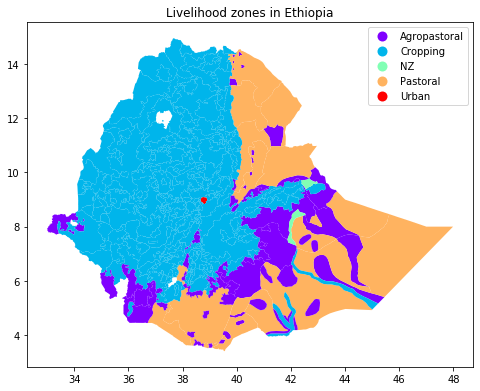

In [11]:
#plt.subplot(1,1,1)
plt = df.plot(column='LZTYPE', cmap='rainbow', legend=True, figsize=(8, 8))
plt.set_title('Livelihood zones in Ethiopia')

In [6]:
df['LZTYPE'].unique()
df['past_agropast'] = np.where((df['LZTYPE']=='Pastoral')|(df['LZTYPE']=='Agropastoral'), 1, 0)
df.head()

,OBJECTID,FNID,EFF_YEAR,COUNTRY,LZNUM,LZCODE,LZNAMEEN,LZNAMEFR,LZNAMESP,LZNAMEPT,CLASS,ADMIN1,LZTYPE,MAINCROPS,MAINLSTOCK,LIAS,SHAPE_Leng,SHAPE_Area,geometry,past_agropast
0,1,ET2009L101,2009,ET,1,ET01,Addis Ababa City,None,None,None,UB01,Addis Ababa,Urban,None,None,UBN,1.032096,0.045311,"POLYGON ((38.77103 9.09937, 38.77103 9.09937, ...",0
1,2,ET2009L102,2009,ET,2,ET02,Asale Agropastoral,None,None,None,PS04,Afar,Agropastoral,maize & barley,cattle & shoats,AAP,2.842439,0.103596,"MULTIPOLYGON (((40.01477 13.28229, 40.01104 13...",1
2,3,ET2009L103,2009,ET,3,ET03,Awsa-Gewane Agropastoral,None,None,None,PS02,Afar,Agropastoral,maize & date palm,cattle & camels,AGA,4.891343,0.457428,"MULTIPOLYGON (((40.35589 9.45828, 40.34862 9.4...",1
3,4,ET2009L104,2009,ET,4,ET04,Aramiss - Adaar Pastoral,None,None,None,SH01,Afar,Pastoral,None,camels & cattle,ARP,9.140794,1.303726,"POLYGON ((40.98186 11.61329, 40.98163 11.61287...",1
4,5,ET2009L105,2009,ET,5,ET05,Asale Pastoral,None,None,None,SH02,Afar,Pastoral,None,camels & shoats,ASP,9.671888,1.907956,"POLYGON ((40.22576 14.48282, 40.27167 14.45745...",1


In [58]:
def get_total_shape_area(row, df):
    sub = df.loc[df['ADMIN1']==row['ADMIN1']]
    total = sub['SHAPE_Area'].sum()
    return total

In [59]:
grouped = df[['ADMIN1', 'SHAPE_Area', 'past_agropast']].groupby(['ADMIN1', 'past_agropast']).agg('sum').reset_index()
#grouped['proportion'] = grouped['area']/grouped['SHAPE_Area']
grouped

,ADMIN1,past_agropast,SHAPE_Area
0,Addis Ababa,0,0.045311
1,Afar,1,8.025981
2,Amhara,0,12.653667
3,Benshangul,0,4.053200
4,Gambela,0,1.534295
5,Gambela,1,0.554521
6,Oromia,0,16.174272
7,Oromia,1,10.574382
8,SNNPR,0,7.099386
9,SNNPR,1,2.112710


In [61]:
grouped['total_shape_area'] = grouped.apply(lambda x: get_total_shape_area(x, grouped), axis=1)
grouped['proportion'] = grouped['SHAPE_Area']/grouped['total_shape_area']
grouped.head()


,ADMIN1,past_agropast,SHAPE_Area,total_shape_area,proportion
0,Addis Ababa,0,0.045311,0.045311,1.000000
1,Afar,1,8.025981,8.025981,1.000000
2,Amhara,0,12.653667,12.653667,1.000000
3,Benshangul,0,4.053200,4.053200,1.000000
4,Gambela,0,1.534295,2.088816,0.734528


In [81]:
past_agropast = grouped.loc[grouped['past_agropast']==1]
past_agropast

,ADMIN1,past_agropast,SHAPE_Area,total_shape_area,proportion
1,Afar,1,8.025981,8.025981,1.000000
5,Gambela,1,0.554521,2.088816,0.265472
7,Oromia,1,10.574382,26.748654,0.395324
9,SNNPR,1,2.112710,9.212096,0.229341
11,Somali,1,24.195270,25.712477,0.940993


/usr/local/lib/python3.7/site-packages/geopandas/plotting.py:509: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning
/usr/local/lib/python3.7/site-packages/geopandas/plotting.py:509: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning


Text(0.5, 1, 'Ethiopia regions of interest')

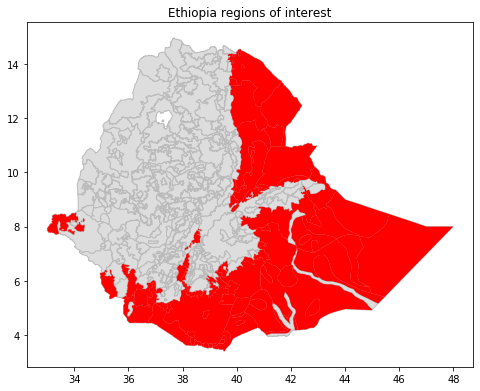

In [80]:
f, ax = plt.subplots(figsize=(8, 8))
df.plot(column='ADMIN0', color='#DDDDDD', edgecolor='#BBBBBB',ax=ax)
df.loc[df['past_agropast']==1].plot(column='past_agropast', color='red', legend=True, ax=ax)
plt.title('Ethiopia regions of interest')
#    plt.show()
#ax.set_title('Livelihood zones in Ethiopia')
#    color = 'YlGnBu'
#    gdf.plot(ax=ax, column='ADMIN0', color='#DDDDDD', edgecolor='#BBBBBB')
#    gdf.loc[gdf['ADMIN1']==region].plot(ax=ax, color='red')
#    plt.title(region)
#    plt.show()

In [34]:
# Admin1 regions that are 30% or more agropastoral
grouped.loc[(grouped['LZTYPE']=='Agropastoral')&(grouped['proportion']>0.3)]

,ADMIN1_1,LZTYPE,SHAPE_Area,area,proportion
11,Gambela,Agropastoral,1.663564,0.554521,0.333333


In [22]:
overlap['proportion'] = overlap['area']/overlap['SHAPE_Area']
overlap[['area', 'SHAPE_Area', 'proportion']]

,area,SHAPE_Area,proportion
0,0.000087,0.872704,0.000100
1,0.872601,0.872704,0.999882
2,0.000016,0.872704,0.000018
3,0.000355,0.811976,0.000437
4,0.058629,0.811976,0.072205
...,...,...,...
707,0.062402,0.062690,0.995414
708,0.000287,0.062690,0.004586
709,0.083492,0.083661,0.997978
710,0.000169,0.083661,0.002022


In [ ]:
# for each admin1 zone, get percentage in each livelihood zone
# Zones that are majoritarily agropastoral
overlap['']